In [1]:
import torch
import numpy as np

from torch.utils.data import Dataset, DataLoader

from utils import normalize, onehot
from sEMGdata import sEMGData, sEMGDataset

In [2]:
# load the data and labels
sEMG_vowels = sEMGData(file_dir="data/subjects_40_vowels_v6.mat")

# leave-one-subject-out data partition
x_train, y_train, x_test, y_test = sEMG_vowels.load_data(sub_test=0, sub_normalize=True)
# Normalize the signal per channel
x_train, x_test = normalize(x_train, x_test)
# Onehot encode the label
y_train, y_test = onehot(y_train), onehot(y_test)
# TODO: split into training and validation

train_dataset = sEMGDataset(x_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True, num_workers=8, pin_memory=True)


Total number of subjects:       40
Testing Subject ID:             44
Testing Subject VFI-1:          0
# of Testing Samples:           165
# of Healthy Training Samples:  3037
# of Fatigued Training Samples: 3270


In [3]:
batcher = iter(train_loader)
x,y = next(batcher)
print(x.shape)
print(x.dtype)
print(y.shape)
print(y.dtype)

torch.Size([64, 4000, 4])
torch.float32
torch.Size([64, 2])
torch.float32


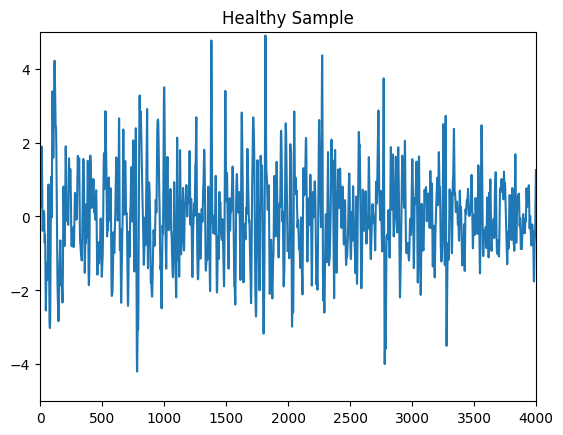

In [8]:
import matplotlib.pyplot as plt
i = np.random.randint(x_train.shape[0])
plt.plot(x_train[i,:,0])
plt.xlim([0, 4000])
plt.ylim([-5,5])
if y_train[i,0] == 1:
  plt.title("Healthy Sample")
else:
  plt.title("Fatigued Sample")